In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

Essentials for machine learning

Project - Predict Taxi Trip Duration

Introduction to Logistic Regression

Logistic regression from Scratch

## About problem statement
- Data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y)
- Get data from https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [3]:
df = pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [6]:
# selecting columns which are object
for i in df.select_dtypes(['object']):
    print(i)
    print('******************')
    print(df[i].unique())
    print(df[i].nunique())
    print('##################')

job
******************
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
12
##################
marital
******************
['married' 'single' 'divorced' 'unknown']
4
##################
education
******************
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
8
##################
default
******************
['unknown' 'no' 'yes']
3
##################
housing
******************
['yes' 'no' 'unknown']
3
##################
loan
******************
['no' 'yes' 'unknown']
3
##################
contact
******************
['cellular' 'telephone']
2
##################
month
******************
['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
10
##################
day_of_week
******************
['thu' 'fri' 'tue' 'mon' 'wed']
5
##################
poutcome
******************
['nonexistent' 'success' 'failure']
3
########

In [7]:
# merging education into smaller group
df['education'] = np.where(((df['education']=='basic.4y') | (df['education']=='basic.6y') | (df['education']=='basic.9y')), 'basic', df['education'])

In [8]:
df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [9]:
## Looking into other columns
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [10]:
# checking for skewness in data
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

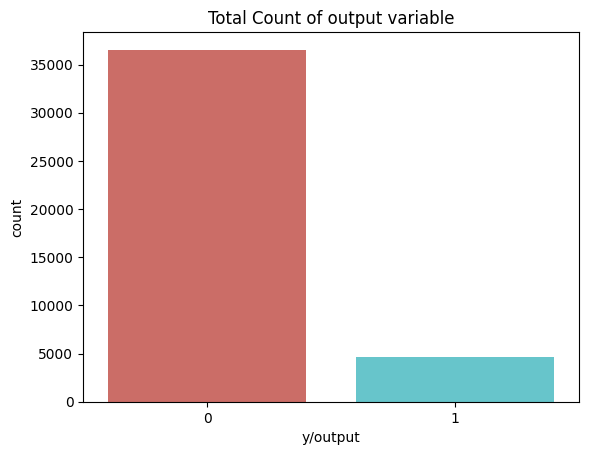

In [11]:
sns.countplot(x='y', data=df, palette='hls')
plt.title('Total Count of output variable')
plt.xlabel('y/output')
plt.show()

In [12]:
df.groupby('y').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [13]:
df.groupby('marital').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [14]:
df.groupby('job').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [15]:
df.groupby('education').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Filtering out categorical columns to use for prediction

In [16]:
cat_cols = df.select_dtypes('object')
for col in cat_cols:
    cat_lst = 'var'+'_'+col
    cat_lst = pd.get_dummies(df[col], prefix=col, dtype='int')
    df1 = df.join(cat_lst)
    df = df1
len(df.columns)

72

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', '

In [19]:
cols_to_del = df.select_dtypes('object')
cols_to_del = cols_to_del.columns
df = df.drop(cols_to_del, axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  int64  
 12  job_blue-collar                41188 non-null 

### Data looks good, now apply modelling
- Just joking we do know the *y* column is skewed

- So first lets apply simple *SMOTE (Synthetic Minority Oversampling Technique)*

### Why SMOTE?
- A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.

In [21]:
x = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']
print(x.shape, y.shape)
os = SMOTE(random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
cols_train = x_train.columns
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

os_df_x, os_df_y = os.fit_resample(x_train, y_train)
os_df_x = pd.DataFrame(data=os_df_x, columns=cols_train)
os_df_y = pd.DataFrame(data=os_df_y, columns=['y'])
print(os_df_x.shape, os_df_y.shape)

print('Previous NO subscription number: ', len(df['y']==0))
print('Previous YES subscription number: ', len(df['y']==1))
print('Length of oversampled data: ', len(os_df_x))
print('Number of NO subscription in oversampled: ', len(os_df_y['y']==0))
print('Number of YES subscription in oversampled: ', len(os_df_y['y']==1))
print('Proportion of NO subscription in oversampled: ', (len(os_df_y['y']==0)/len(os_df_x)))
print('Proportion of YES subscription in oversampled: ', (len(os_df_y['y']==1)/len(os_df_x)))

(41188, 61) (41188, 1)
(32950, 61) (32950, 1) (8238, 61) (8238, 1)
(58506, 61) (58506, 1)
Previous NO subscription number:  41188
Previous YES subscription number:  41188
Length of oversampled data:  58506
Number of NO subscription in oversampled:  58506
Number of YES subscription in oversampled:  58506
Proportion of NO subscription in oversampled:  1.0
Proportion of YES subscription in oversampled:  1.0


### Using <u>*RFE(Recursive Feature Elimination)*</u>
- The idea is to continuously create model and choose the best or worst performing feature, setting the feature aside and then repeating the process with rest of the other features. It selects features by recursively considering smaller and smaller set of features

In [27]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=20)
rfe.fit(os_df_x, os_df_y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[39 37 32 38 33 27 30 34 36 35 10  2  4  6  9 12  5  3 13  7 11  8  1  1
  1  1  1  1 40  1  1  1 17 16 42  1  1  1  1  1  1 19 18 25 20 28 22 24
 31 23 21 41 29  1  1  1  1  1 15 14 26]


In [29]:
for i in range(os_df_x.shape[1]):
    print('Column: {0}, Selected: {1}, Rank: {2}'.format(i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected: False, Rank: 39
Column: 1, Selected: False, Rank: 37
Column: 2, Selected: False, Rank: 32
Column: 3, Selected: False, Rank: 38
Column: 4, Selected: False, Rank: 33
Column: 5, Selected: False, Rank: 27
Column: 6, Selected: False, Rank: 30
Column: 7, Selected: False, Rank: 34
Column: 8, Selected: False, Rank: 36
Column: 9, Selected: False, Rank: 35
Column: 10, Selected: False, Rank: 10
Column: 11, Selected: False, Rank: 2
Column: 12, Selected: False, Rank: 4
Column: 13, Selected: False, Rank: 6
Column: 14, Selected: False, Rank: 9
Column: 15, Selected: False, Rank: 12
Column: 16, Selected: False, Rank: 5
Column: 17, Selected: False, Rank: 3
Column: 18, Selected: False, Rank: 13
Column: 19, Selected: False, Rank: 7
Column: 20, Selected: False, Rank: 11
Column: 21, Selected: False, Rank: 8
Column: 22, Selected: True, Rank: 1
Column: 23, Selected: True, Rank: 1
Column: 24, Selected: True, Rank: 1
Column: 25, Selected: True, Rank: 1
Column: 26, Selected: True, Rank: 1
Co

In [34]:
mdl_cols = os_df_x.columns[rfe.get_support()]
mdl_cols

Index(['marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

- <u>Logit from statsmodels</u> implements the logistic regression model estimation using maximum likelihood estimation (MLE). It fits a logistic regression model to the given data and provides various statistical measures and information about the model's coefficients, standard errors, p-values, and other diagnostics.

In [48]:
x = os_df_x[mdl_cols]
y = os_df_y['y']

In [49]:
## Adding statmodels Logit 
logit_mdl = Logit(y,x)
result = logit_mdl.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.462941
         Iterations 7
                                        Results: Logit
Model:                        Logit                      Method:                     MLE       
Dependent Variable:           y                          Pseudo R-squared:           0.332     
Date:                         2023-07-02 19:21           AIC:                        54209.6994
No. Observations:             58506                      BIC:                        54389.2371
Df Model:                     19                         Log-Likelihood:             -27085.   
Df Residuals:                 58486                      LL-Null:                    -40553.   
Converged:                    1.0000                     LLR p-value:                0.0000    
No. Iterations:               7.0000                     Scale:                      1.0000    
---------------------------------------------------------------------------

### Dropping those columns whose p-value (P> |z|) is greater than 0.05

In [62]:
mdl_cols_new = os_df_x[mdl_cols].drop(['loan_unknown', 'housing_unknown', 'marital_unknown', 'marital_divorced', 'housing_yes'], axis=1)

In [63]:
x_updated = mdl_cols_new
y = os_df_y['y']

logit_mdl = Logit(y,x_updated)
result = logit_mdl.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.464204
         Iterations 7
                                Results: Logit
Model:                   Logit                Method:               MLE       
Dependent Variable:      y                    Pseudo R-squared:     0.330     
Date:                    2023-07-02 19:46     AIC:                  54347.4031
No. Observations:        58506                BIC:                  54482.0563
Df Model:                14                   Log-Likelihood:       -27159.   
Df Residuals:            58491                LL-Null:              -40553.   
Converged:               1.0000               LLR p-value:          0.0000    
No. Iterations:          7.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [65]:
x = os_df_x[mdl_cols]
y = os_df_y['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
print(classification_report(y_pred_log_reg, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      6581
           1       0.87      1.00      0.93      5121

    accuracy                           0.93     11702
   macro avg       0.93      0.94      0.93     11702
weighted avg       0.94      0.93      0.93     11702



In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_updated,y,test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
print(classification_report(y_pred_log_reg, y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      6784
           1       0.83      0.99      0.91      4918

    accuracy                           0.91     11702
   macro avg       0.91      0.92      0.91     11702
weighted avg       0.93      0.91      0.91     11702

